# Assignment 1

In [244]:
import numpy as np
from numpy import unravel_index
import pandas as pd
from random import random
import random
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [245]:
import seaborn as sb

## Extracting data

In [246]:
df=pd.read_csv("cancer.csv")

In [247]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [248]:
del df['id']
del df['Unnamed: 32']
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Features Scaling

In [249]:
arr=df.to_numpy()
arr=np.delete(arr,0,axis=1)
arr=(arr-np.mean(arr))/np.std(arr)
arr

array([[-0.19229615125762523, -0.22562986347060932, 0.2667979850160754,
        ..., -0.26993435303032665, -0.2690815181068223,
        -0.27057605984231115],
       [-0.1809951029646556, -0.1932598065384211, 0.3110385229071581,
        ..., -0.2702821449816684, -0.26989230261807373,
        -0.27070694175044835],
       [-0.18484972408783903, -0.17801653209674112, 0.2983357942057581,
        ..., -0.2700324706589168, -0.2695142869329252,
        -0.27071324931228624],
       ...,
       [-0.19838470053174453, -0.148099415879306, 0.20328434150907548,
        ..., -0.27047575208808283, -0.27012533198597527,
        -0.27075433606925836],
       [-0.18086369542636524, -0.142624101783875, 0.3425763320968408,
        ..., -0.26993610513083716, -0.2693066630224264,
        -0.2705537205608018],
       [-0.23710612181463275, -0.16360550539756666,
        -0.061195230556624756, ..., -0.27109687171906854,
        -0.26983930157763, -0.2707885458317266]], dtype=object)

## Distance matrix

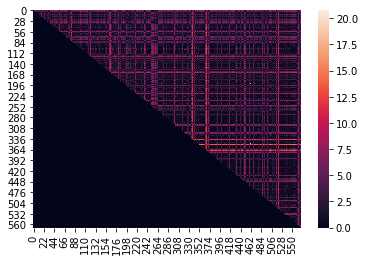

In [250]:
matrix=np.zeros((len(arr),len(arr)))
for i in range(len(arr)):
    for j in range(i,len(arr)):
        matrix[i][j]=(sum((arr[i]-arr[j])**2))**0.5
sb.heatmap(matrix)

## K-mean

### 1.Select k initial points as centroids
#### for which I have selected those points which are farthest 

In [251]:
max_index=unravel_index(matrix.argmax(), matrix.shape)
c=np.array([arr[max_index[0]],arr[max_index[1]]]) #initial cluster points

### 2. Assigning all points to the nearest point and recomputing the centroids

In [252]:
def distance(x,y):
    return (sum((x-y)**2))**0.5

In [253]:
c0=[]
c1=[]
temp=-1

while abs(temp-len(c0))>0:
    temp=len(c0)
    c0=[]
    c1=[]
    for i in range(len(arr)):
        if(distance(arr[i],c[0])>distance(arr[i],c[1])):
            c1.append(i);
        else:
            c0.append(i);
    c[0]=sum(arr[c0])/len(c0)
    c[1]=sum(arr[c1])/len(c1)
    
print(len(c0),len(c1))

438 131


### Plot clusters with respect to radius_mean and texture_mean

In [254]:
X0=arr[c0][:,0]
Y0=arr[c0][:,1]
X1=arr[c1][:,0]
Y1=arr[c1][:,1]
X=c[:,0]
Y=c[:,1]

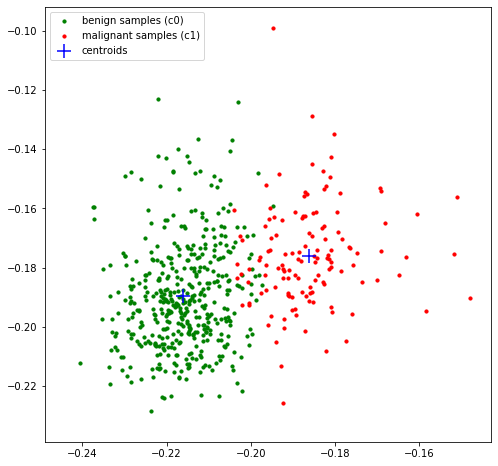

In [255]:
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(111)

ax1.scatter(X0, Y0, s=10, c='g', marker="o", label='benign samples (c0)')
ax1.scatter(X1, Y1, s=10, c='r', marker="o", label='malignant samples (c1)')
ax1.scatter(X, Y , s=200, c='b',marker="+", label='centroids')
plt.legend(loc='upper left');
plt.show()


In [256]:
t=df['diagnosis']
true=t.to_numpy()
correct1=0;
correct2=0
for i in c1:
    if(true[i]=='M'):
        correct1=correct1+1
    else:
        correct2=correct2+1
for i in c0:
    if(true[i]=='B'):
        correct1=correct1+1
    else:
        correct2=correct2+1
correct=max(correct1,correct2)
accurecy=(correct)/len(true)
print("Accurecy of the model is ",accurecy*100," %")
print("According to model red cluster represent benign samples which counts to",len(c0))
print("According to model green cluster represent malignant samples which counts to",len(c1))

Accurecy of the model is  85.41300527240774  %
According to model red cluster represent benign samples which counts to 438
According to model green cluster represent malignant samples which counts to 131


## K-medoid

### 1.Select k initial points as medoids
#### for which I have selected those points which are farthest 

In [257]:
max_index=np.array(unravel_index(matrix.argmax(), matrix.shape))
c=np.array([arr[max_index[0]],arr[max_index[1]]]) #initial cluster points


### 2. Assigning all points to the nearest point and recomputing the medoids

In [258]:
def distance(x,y):
    return (sum((x-y)**2))**0.5
def sse(arr,x):
    return np.sum(np.sum((arr-x)**2,axis=1)**0.5)

In [259]:

accurecy=0
while accurecy<0.80:
    c0=[]
    c1=[]
    t=-1
    while t!=len(c0):
        t=len(c0)
        c0=[]
        c1=[]
        for i in range(len(arr)):
            if(distance(arr[i],c[0])>distance(arr[i],c[1])):
                c1.append(i);
            else:
                c0.append(i);
        r=random.choice(list(range(len(arr))))
        random_element=arr[r];
        if sse(arr,random_element)<sse(arr,c[0]):
            c[0]=random_element
        elif sse(arr,random_element)<sse(arr,c[1]):
            c[1]=random_element

    correct1=0;
    correct2=0
    for i in c1:
        if(true[i]=='M'):
            correct1=correct1+1
        else:
            correct2=correct2+1
    for i in c0:
        if(true[i]=='B'):
            correct1=correct1+1
        else:
            correct2=correct2+1
    correct=max(correct1,correct2)
    accurecy=(correct)/len(true)
print(len(c0),len(c1))
accurecy

293 276


0.81195079086116

### Plot clusters with respect to radius_mean and texture_mean

Accurecy of the model is  81.195079086116  %
According to model red cluster represent benign samples which counts to 293
According to model green cluster represent malignant samples which counts to 276


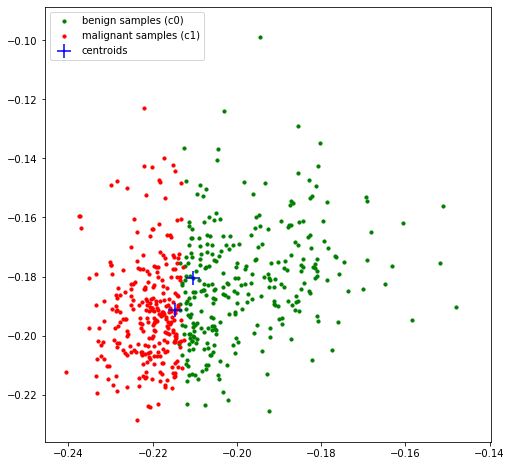

In [260]:
print("Accurecy of the model is ",accurecy*100," %")
print("According to model red cluster represent benign samples which counts to",len(c0))
print("According to model green cluster represent malignant samples which counts to",len(c1))


X0=arr[c0][:,0]
Y0=arr[c0][:,1]
X1=arr[c1][:,0]
Y1=arr[c1][:,1]
X=c[:,0]
Y=c[:,1]
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(111)

ax1.scatter(X0, Y0, s=10, c='g', marker="o", label='benign samples (c0)')
ax1.scatter(X1, Y1, s=10, c='r', marker="o", label='malignant samples (c1)')
ax1.scatter(X, Y , s=200, c='b',marker="+", label='centroids')
plt.legend(loc='upper left');
plt.show()


In [ ]:
%load_ext watermark

%watermark -v -m -p wget,pa